In [12]:
!pip install pyLDAvis
!pip install pyLDAvis

import pandas as pd
import re
import string
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import gensim
from gensim.corpora import Dictionary
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer



In [18]:
data=pd.read_csv('/content/corrected_reviews_no_corrected_column.csv')
len(data)

498

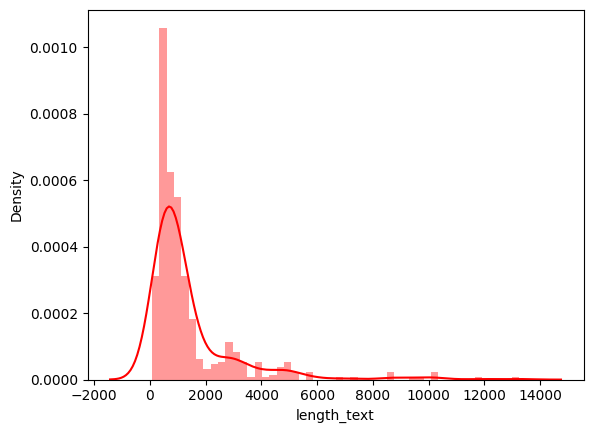

In [19]:
data['length_text'] = data['text'].str.len()
sns.distplot(data['length_text'], color="r")
plt.show()

In [21]:
data.head(5)

,product_name,category,text,length_text
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,Looks durable Charging is fine tooNo complains...,483
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,I ordered this cable to connect my phone to An...,1186
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,"Not quite durable and sturdy,https://m.media-a...",271
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,"Good product,long wire,Charges good,Nice,I bou...",443
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,"Bought this instead of original apple, does th...",2451


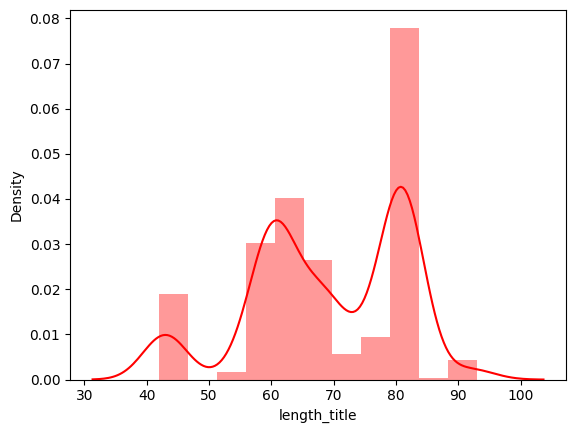

In [22]:
data['length_title'] = data['category'].str.len()
sns.distplot(data['length_title'], color="r")
plt.show()

In [23]:
titles = [x for x in data['category']]
docs = [x for x in data['text']]

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [26]:
def words(text):
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    text = regex.sub(" ", text.lower())
    words = text.split(" ")
    words = [re.sub('\S*@\S*\s?', '', sent) for sent in words]
    words = [re.sub('\s+', ' ', sent) for sent in words]
    words = [re.sub("\'", "", sent) for sent in words]
    words = [w for w in words if not len(w) < 2]
    words = [w for w in words if w not in stop_words]
    words = [lmtzr.lemmatize(w) for w in words]

    return words

In [27]:
nltk.download('wordnet')
docs = [words(x) for x in data['text']]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
dictionary = Dictionary(docs)
print('Number of unique words in initital documents:', len(dictionary))

dictionary.filter_extremes(no_below=10, no_above=0.2)
print('Number of unique words after removing rare and common words:', len(dictionary))

Number of unique words in initital documents: 5476
Number of unique words after removing rare and common words: 864


In [29]:
corpus = [dictionary.doc2bow(doc) for doc in docs]
#print(len(corpus))
#corpus[336]
bow_doc_300 = corpus[300]

for i in range(len(bow_doc_300)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_300[i][0],
                                                     dictionary[bow_doc_300[i][0]],
                                                     bow_doc_300[i][1]))

Word 26 ("braided") appears 1 time.
Word 27 ("brand") appears 2 time.
Word 60 ("usb") appears 3 time.
Word 88 ("damaged") appears 1 time.
Word 146 ("quickly") appears 1 time.
Word 180 ("box") appears 1 time.
Word 199 ("easy") appears 1 time.
Word 245 ("received") appears 2 time.
Word 318 ("full") appears 1 time.
Word 319 ("hour") appears 2 time.
Word 400 ("amazing") appears 1 time.
Word 569 ("liked") appears 1 time.
Word 714 ("taken") appears 1 time.
Word 763 ("handle") appears 1 time.
Word 795 ("fully") appears 1 time.


In [30]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [31]:
get_lda_topics(lda_model, 10)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,matrix,translation,neuron,cluster,cnn,cnn,sheet,neuron,cnn,bot
1,analysis,sentence,policy,table,box,pixel,woman,price,sequence,average
2,policy,bot,cpu,bot,neuron,star,table,app,star,man
3,member,review,app,neuron,man,box,men,pixel,conversation,policy
4,house,sequence,reward,average,region,sheet,neuron,convolution,zero,market
5,neuron,rating,agent,review,pixel,github,page,sound,social,player
6,semantic,app,pixel,policy,card,region,average,house,bot,cognitive
7,document,car,table,pixel,activation,bounding,facial,cnn,agent,cpu
8,cnn,member,player,rnn,matrix,matrix,www,woman,box,car
9,agent,average,label,batch,gtx,sentence,review,cpu,average,sequence


In [33]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=500,
                                           passes=20,
                                           alpha='auto',
                                           per_word_topics=True)


In [34]:
pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [37]:
import pyLDAvis.gensim_models as gensimvis

lda_visualization = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_visualization)

pyLDAvis.save_html(lda_visualization, 'lda_topics.html')


In [38]:
lda_model.save('model10.gensim')
topics = lda_model.print_topics(num_words=6)
for topic in topics:
    print(topic)

(0, '0.019*"original" + 0.016*"video" + 0.015*"faced" + 0.015*"review" + 0.015*"stick" + 0.014*"installation"')
(1, '0.027*"power" + 0.027*"original" + 0.020*"bank" + 0.014*"easy" + 0.013*"mi" + 0.012*"take"')
(2, '0.093*"watch" + 0.019*"ui" + 0.017*"face" + 0.017*"smartwatch" + 0.016*"boat" + 0.016*"call"')
(3, '0.043*"image" + 0.034*"com" + 0.033*"http" + 0.033*"medium" + 0.033*"jpg" + 0.033*"sy"')
(4, '0.019*"camera" + 0.009*"hz" + 0.009*"wifi" + 0.009*"gb" + 0.008*"driver" + 0.008*"display"')
(5, '0.031*"camera" + 0.021*"video" + 0.014*"samsung" + 0.012*"screen" + 0.012*"heating" + 0.011*"call"')
(6, '0.028*"usb" + 0.016*"port" + 0.015*"car" + 0.012*"durable" + 0.012*"type" + 0.011*"wire"')
(7, '0.022*"camera" + 0.017*"screen" + 0.013*"install" + 0.012*"wifi" + 0.012*"bluetooth" + 0.011*"installation"')
(8, '0.024*"review" + 0.021*"update" + 0.015*"mobile" + 0.013*"gb" + 0.010*"usage" + 0.010*"level"')
(9, '0.039*"remote" + 0.012*"button" + 0.010*"samsung" + 0.010*"installation" + 

In [44]:
for topic_prob in lda_model.get_document_topics(corpus[300]):
    topic = topic_prob[0]
    score = topic_prob[1]
    print("\nScore: {:.4f}\tTopic: {}".format(score, lda_model.print_topic(topic, 40)))


Score: 0.3254	Topic: 0.027*"power" + 0.027*"original" + 0.020*"bank" + 0.014*"easy" + 0.013*"mi" + 0.012*"take" + 0.009*"range" + 0.009*"r" + 0.009*"mah" + 0.009*"oneplus" + 0.008*"light" + 0.008*"box" + 0.008*"quick" + 0.007*"mobile" + 0.007*"expected" + 0.007*"hai" + 0.007*"find" + 0.007*"button" + 0.007*"weight" + 0.007*"want" + 0.007*"bad" + 0.007*"everything" + 0.006*"super" + 0.006*"company" + 0.006*"satisfied" + 0.006*"low" + 0.006*"purchase" + 0.006*"cost" + 0.006*"happy" + 0.006*"charged" + 0.006*"easily" + 0.006*"would" + 0.006*"full" + 0.006*"around" + 0.006*"it’s" + 0.005*"compared" + 0.005*"put" + 0.005*"carry" + 0.005*"hard" + 0.005*"smart"

Score: 0.5600	Topic: 0.028*"usb" + 0.016*"port" + 0.015*"car" + 0.012*"durable" + 0.012*"type" + 0.011*"wire" + 0.011*"length" + 0.011*"connector" + 0.011*"data" + 0.011*"apple" + 0.009*"samsung" + 0.009*"original" + 0.009*"micro" + 0.009*"year" + 0.008*"would" + 0.008*"brand" + 0.008*"adapter" + 0.008*"it’s" + 0.008*"iphone" + 0.007

In [45]:
words_list=list(chain.from_iterable(docs))

In [46]:
def cosine_sim(text1, text2):
    tfidf_score = TfidfVectorizer().fit_transform([text1, text2])
    return ((tfidf_score * tfidf_score.T).A)[0, 1]

def closest_doc_name(sentence, docs):
    cos = []
    for i in range(len(docs)):
        cos.append(cosine_sim(', '.join(sentence.split(' ')),', '.join(docs[i])))
    return [titles[x] for x in np.argsort(cos)[-10:][::-1]]

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer=words, stop_words=stop_words).fit(words_list)

In [48]:
closest_doc_name('news', docs)

['Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones',
 'Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters',
 'Electronics|HomeTheater,TV&Video|Projectors',
 'Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables',
 'Electronics|HomeTheater,TV&Video|Accessories|RemoteControls',
 'Electronics|HomeTheater,TV&Video|Accessories|Cables|OpticalCables',
 'Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables',
 'Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables',
 'Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables',
 'Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables']